# PA 3: Association Analysis - Apriori/FP Growth

## Tasks

# Introduction
The following project uses dataset which has transaction id's along with the items purchased. This project helps us to predict the most frequent itemsets and rules associated with them.

In [1]:
#Importing Libraries and Packages
'''
The following packages and libraries are imported.
1. matplotlib - Used for creating plots
2. time - Used to calculate time taken to run the algorithm
3. mlxtend - This library is imported in order to perform encoding on the dataset and also apply apriori,fp-growth algorithms 
and association rules.
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules, fpgrowth

1.    Load the dataset (from the csv file)

In [2]:
# Reading the dataset and printing the dataset
df_data = pd.read_csv('dataset3.csv')
df_data

,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
995,995,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
996,996,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True
997,997,False,False,True,True,True,False,True,True,True,False,True,False,True,False,True,True


2.    Pre-process the dataset and provide a detailed explanation (such as Handling of null values, empty strings, unncessary trailing characters such as commas and white spaces)

In [3]:
#Preprocessing the Dataset
'''
Preprocessing the dataset is handled in two steps:
1. Handling Null and "Unknown" Values: First, we are checking for null values and unknown values in the dataset.
For the given dataset, there are no null values or unknown values. If there exists any, we need to either drop them or 
replace them with the mean value etc. Here in this scenario, null values are dropped and the items are converted to a list 
which is later used to encode it.
2. As a part of preprocessing we will drop the first column as it doesn't correspond to any binary value in the transaction 
matrix.

Preprocessing the dataset helps to be able to convert the dataset into binary transaction matrix which will be used to 
perform apriori and fp-growth algorithm.
'''
#Handling null values
print(df_data.isnull().sum(),end="\n")
print(df_data.isna().sum())

Unnamed: 0      0
Apple           0
Bread           0
Butter          0
Cheese          0
Corn            0
Dill            0
Eggs            0
Ice cream       0
Kidney Beans    0
Milk            0
Nutmeg          0
Onion           0
Sugar           0
Unicorn         0
Yogurt          0
chocolate       0
dtype: int64
Unnamed: 0      0
Apple           0
Bread           0
Butter          0
Cheese          0
Corn            0
Dill            0
Eggs            0
Ice cream       0
Kidney Beans    0
Milk            0
Nutmeg          0
Onion           0
Sugar           0
Unicorn         0
Yogurt          0
chocolate       0
dtype: int64


In [4]:
df_data.drop(columns = ['Unnamed: 0'],inplace=True)
df_data.head()

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


3.    Encode the dataset

In [5]:
# Write your code here
'''
Encoding the Dataset:
We have used One-Hot Encoder (TransactionEncoder) to convert the dataset into binary transaction matrix.
The followed encoded dataset represents all the items from the dataset and True indicates if the item is present in that
specific transaction and False indicates that the item is not present in the respective transaction.
'''
encoded_dt = df_data
encoded_dt

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
995,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
996,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True
997,False,False,True,True,True,False,True,True,True,False,True,False,True,False,True,True


For each of the combinations in tasks 4 & 5, print the output in the following Sample format: 

- Support = 0.02
- Confidence = 0.1
- Total Number of Association Rules: 10
- Top 5 rules ordered by Confidence descending:
- Number of Maximal Sets: 5
- Number of Closed Sets: 5

4.	Execute Apriori algorithm and generate rules for 3 different combinations of support and confidence

In [6]:
'''
Apriori Algorithm:
We are calculating various metrics for three different combinations of Support and Confidence.
In this scenarios, the three combinations of Support and Confidence values are [0.002,0.02],[0.005,0.03] and [0.008,0.05]
We calculate:
1. Support
2. Confidence
3. Number of Association Rules
4. Top five Rules ordered by Confidence descending
5. Number of Maximal Sets
6. Number of Closed Sets

In this scenario, we are using for loop to iterate over three combinations of support and confidence. We apply the apriori
algorithm to the encoded dataset. And we generated association rules for the apriori itemsets generated. We calculate the 
time taken to calculate number of itemsets and to perform the algorithm. These association rules are sorted according
to their confidence values in descending order and the top five rules are printed for each combination of support and 
confidence.
'''
#Combination 1
support = 0.002
confidence = 0.02
apriori_num_of_itemsets = []
time_taken_apriori = []
start_time = time.time()
freq_items_bought = apriori(encoded_dt,min_support=support,use_colnames=True)
apriori_num_of_itemsets.append(len(freq_items_bought))
end_time = time.time()
time_taken_apriori.append(end_time-start_time)
print(freq_items_bought)

        support                                           itemsets
0      0.383383                                            (Apple)
1      0.384384                                            (Bread)
2      0.420420                                           (Butter)
3      0.404404                                           (Cheese)
4      0.407407                                             (Corn)
...         ...                                                ...
38624  0.002002  (Kidney Beans, Sugar, Butter, Unicorn, Eggs, C...
38625  0.002002  (Nutmeg, Yogurt, Butter, Unicorn, Eggs, Cheese...
38626  0.002002  (Nutmeg, Sugar, chocolate, Butter, Unicorn, Eg...
38627  0.002002  (Nutmeg, chocolate, Butter, Unicorn, Eggs, Che...
38628  0.002002  (Nutmeg, Sugar, chocolate, Unicorn, Eggs, Chee...

[38629 rows x 2 columns]


In [7]:
item_rules = association_rules(freq_items_bought, metric = 'confidence', min_threshold = confidence)
print(item_rules)

                           antecedents  \
0                              (Bread)   
1                              (Apple)   
2                             (Butter)   
3                              (Apple)   
4                             (Cheese)   
...                                ...   
5883483          (Onion, Dill, Yogurt)   
5883484           (Corn, Dill, Yogurt)   
5883485    (Kidney Beans, Onion, Corn)   
5883486  (Kidney Beans, Onion, Yogurt)   
5883487          (Corn, Onion, Yogurt)   

                                               consequents  \
0                                                  (Apple)   
1                                                  (Bread)   
2                                                  (Apple)   
3                                                 (Butter)   
4                                                  (Apple)   
...                                                    ...   
5883483  (Nutmeg, Sugar, Unicorn, Eggs, Cheese, Kidney ...   

In [8]:
print("Results obtained for Combination 1 : ")
print("Support : ", support)
print("Confidence: ",confidence)
print("Total Number of Association rules: ",len(item_rules))
print("Top 5 rules ordered by Confidence descending: ")
top_five_rules = pd.DataFrame(item_rules.sort_values(by='confidence',ascending = False).head(5))
counter = 1
for i,r in top_five_rules.iterrows():
    print("Rule ",counter,": ")
    print(set(r['antecedents']),'->',set(r['consequents']))
    print('Support = ',r['support'])
    print('Confidence =',r['confidence'])
    counter = counter+1  

Results obtained for Combination 1 : 
Support :  0.002
Confidence:  0.02
Total Number of Association rules:  5883488
Top 5 rules ordered by Confidence descending: 
Rule  1 : 
{'Yogurt', 'Cheese', 'Nutmeg', 'Dill', 'Onion', 'Unicorn', 'Milk'} -> {'Eggs'}
Support =  0.004004004004004004
Confidence = 1.0
Rule  2 : 
{'Apple', 'Cheese', 'Sugar', 'Dill', 'Butter', 'Unicorn', 'Milk'} -> {'Corn', 'Ice cream'}
Support =  0.002002002002002002
Confidence = 1.0
Rule  3 : 
{'Milk', 'Nutmeg', 'Sugar', 'Unicorn', 'Eggs', 'Kidney Beans', 'Dill', 'Yogurt'} -> {'Cheese', 'Ice cream'}
Support =  0.002002002002002002
Confidence = 1.0
Rule  4 : 
{'Apple', 'Sugar', 'Unicorn', 'Cheese', 'Dill', 'Corn', 'Butter', 'Milk'} -> {'Ice cream'}
Support =  0.002002002002002002
Confidence = 1.0
Rule  5 : 
{'Apple', 'Sugar', 'Unicorn', 'Cheese', 'Dill', 'Ice cream', 'Butter', 'Milk'} -> {'Corn'}
Support =  0.002002002002002002
Confidence = 1.0


In [9]:
#Finding Maximal sets and Closed sets for the respective support and confidence combination taken in previous step.
'''
Maximal Sets - An itemset is maximal set if it is frequent and none of its superset is frequent. This tells us that if 
an itemset is not a subset of another itemset, we can call it as an maximal set. 
In order to find the maximal sets, we are iterating over two for loops to check if itemset is an subset of its superset and 
a list is created to store if an itemset is maximal.

Closed Sets - An itemset is closed if none of its immediate supersets has the same support as the itemset.
In order to find the closed sets, we are iterating over two for loops to check if the itemset is subset of another itemset
and if their support count is equal. We are filtering the itemsets this matches the definition and a list is created to
store the itemsets that are closed.

As the dataset has multiple rows, the execution time to find the number of maximal sets and number of closed sets is higher
for various support combinations.

In order to overcome this, This program below prints the first five maximal and closed sets. To find the number of maximal
sets and closed sets, the code needs to uncommented and can run.
'''
maximal_set=set()
closed_itemsets = []
support = 0.002
freq_items_bought = apriori(encoded_dt,min_support=support,use_colnames=True)
for it in freq_items_bought['itemsets']:
    check_is_maximal = True
    for su in freq_items_bought['itemsets']:
        if it != su and it.issubset(su):
            check_is_maximal = False
            break
    if check_is_maximal:
        maximal_set.add(it)
print("Number of Maximal Sets: ",len(maximal_set))        

Number of Maximal Sets:  1301


In [10]:
for i,row in freq_items_bought.iterrows():
        check_closed_set = True
        for j,row_item in freq_items_bought.iterrows():
            temp_one = set(row['itemsets'])
            temp_two = set(row_item['itemsets'])
            if temp_one!=temp_two and (temp_one.issubset(temp_two)) and row['support'] == row_item['support']:
                check_closed_set = False
                break
        if check_closed_set == True:
            closed_itemsets.append(row['itemsets'])
        #The following two lines needs to be commented if we wanted to find the number of closed sets
        if(len(closed_itemsets)) == 5:
            break
# print("Number of Closed Sets: ",len(closed_itemsets))  
print("Five Closed Sets are: ")
for i in closed_itemsets:
    print(i)

Five Closed Sets are: 
frozenset({'Apple'})
frozenset({'Bread'})
frozenset({'Butter'})
frozenset({'Cheese'})
frozenset({'Corn'})


In [11]:
#Combination 2
support = 0.005
confidence = 0.03
start_time = time.time()
freq_items_bought = apriori(encoded_dt,min_support=support,use_colnames=True)
apriori_num_of_itemsets.append(len(freq_items_bought))
end_time = time.time()
time_taken_apriori.append(end_time-start_time)
print(freq_items_bought)

        support                                           itemsets
0      0.383383                                            (Apple)
1      0.384384                                            (Bread)
2      0.420420                                           (Butter)
3      0.404404                                           (Cheese)
4      0.407407                                             (Corn)
...         ...                                                ...
22557  0.005005  (Nutmeg, Sugar, Butter, Unicorn, Cheese, Kidne...
22558  0.005005  (Nutmeg, chocolate, Unicorn, Eggs, Cheese, Dil...
22559  0.005005  (chocolate, Sugar, Unicorn, Eggs, Cheese, Dill...
22560  0.005005  (Nutmeg, Sugar, Unicorn, Cheese, Dill, Kidney ...
22561  0.005005  (Kidney Beans, Nutmeg, chocolate, Unicorn, Che...

[22562 rows x 2 columns]


In [12]:
item_rules = association_rules(freq_items_bought, metric = 'confidence', min_threshold = confidence)
print(item_rules)

                 antecedents  \
0                    (Bread)   
1                    (Apple)   
2                   (Butter)   
3                    (Apple)   
4                   (Cheese)   
...                      ...   
1614505  (Corn, Onion, Dill)   
1614506  (Corn, Onion, Milk)   
1614507   (Corn, Dill, Milk)   
1614508  (Onion, Dill, Milk)   
1614509    (Nutmeg, Unicorn)   

                                               consequents  \
0                                                  (Apple)   
1                                                  (Bread)   
2                                                  (Apple)   
3                                                 (Butter)   
4                                                  (Apple)   
...                                                    ...   
1614505  (Nutmeg, Unicorn, Cheese, Kidney Beans, chocol...   
1614506  (Nutmeg, Unicorn, Cheese, Kidney Beans, chocol...   
1614507  (Nutmeg, Unicorn, Cheese, Kidney Beans, Onion,..

In [13]:
print("Results obtained for Combination 2 : ")
print("Support : ", support)
print("Confidence: ",confidence)
print("Total Number of Association rules: ",len(item_rules))
print("Top 5 rules ordered by Confidence descending: ")
top_five_rules = pd.DataFrame(item_rules.sort_values(by='confidence',ascending = False).head(5))
counter = 1
for i,r in top_five_rules.iterrows():
    print("Rule ",counter,": ")
    print(set(r['antecedents']),'->',set(r['consequents']))
    print('Support = ',r['support'])
    print('Confidence =',r['confidence'])
    counter = counter+1  

Results obtained for Combination 2 : 
Support :  0.005
Confidence:  0.03
Total Number of Association rules:  1614510
Top 5 rules ordered by Confidence descending: 
Rule  1 : 
{'Bread', 'Cheese', 'Yogurt', 'Kidney Beans', 'chocolate', 'Unicorn', 'Corn'} -> {'Sugar'}
Support =  0.006006006006006006
Confidence = 1.0
Rule  2 : 
{'Apple', 'Bread', 'Sugar', 'Kidney Beans', 'Onion', 'Butter', 'Yogurt'} -> {'Nutmeg'}
Support =  0.005005005005005005
Confidence = 1.0
Rule  3 : 
{'Eggs', 'Cheese', 'Nutmeg', 'Onion', 'chocolate', 'Unicorn', 'Milk'} -> {'Dill'}
Support =  0.005005005005005005
Confidence = 1.0
Rule  4 : 
{'Yogurt', 'Corn', 'Cheese', 'Sugar', 'Kidney Beans', 'Dill', 'Milk'} -> {'Bread'}
Support =  0.005005005005005005
Confidence = 1.0
Rule  5 : 
{'Apple', 'Nutmeg', 'Kidney Beans', 'Onion', 'Unicorn', 'Yogurt'} -> {'chocolate'}
Support =  0.01001001001001001
Confidence = 1.0


In [14]:
#Finding maximal and closed for combination 2
maximal_set=set()
closed_itemsets = []
support = 0.005
freq_items_bought = apriori(encoded_dt,min_support=support,use_colnames=True)
for it in freq_items_bought['itemsets']:
    check_is_maximal = True
    for su in freq_items_bought['itemsets']:
        if it != su and it.issubset(su):
            check_is_maximal = False
            break
    if check_is_maximal:
        maximal_set.add(it)
print("Number of Maximal Sets: ",len(maximal_set))        

Number of Maximal Sets:  4171


In [15]:
for i,row in freq_items_bought.iterrows():
        check_closed_set = True
        for j,row_item in freq_items_bought.iterrows():
            temp_one = set(row['itemsets'])
            temp_two = set(row_item['itemsets'])
            if temp_one!=temp_two and (temp_one.issubset(temp_two)) and row['support'] == row_item['support']:
                check_closed_set = False
                break
        if check_closed_set == True:
            closed_itemsets.append(row['itemsets'])
        #The following two lines needs to be commented if we wanted to find the number of closed sets
        if(len(closed_itemsets)) == 5:
            break
# print("Number of Closed Sets: ",len(closed_itemsets))  
print("Five Closed Sets are: ")
for i in closed_itemsets:
    print(i)

Five Closed Sets are: 
frozenset({'Apple'})
frozenset({'Bread'})
frozenset({'Butter'})
frozenset({'Cheese'})
frozenset({'Corn'})


In [16]:
#Combination 3
support = 0.008
confidence = 0.05
start_time = time.time()
freq_items_bought = apriori(encoded_dt,min_support=support,use_colnames=True)
apriori_num_of_itemsets.append(len(freq_items_bought))
end_time = time.time()
time_taken_apriori.append(end_time-start_time)
print(freq_items_bought)

        support                                           itemsets
0      0.383383                                            (Apple)
1      0.384384                                            (Bread)
2      0.420420                                           (Butter)
3      0.404404                                           (Cheese)
4      0.407407                                             (Corn)
...         ...                                                ...
15150  0.008008  (Nutmeg, Sugar, Butter, Cheese, Kidney Beans, ...
15151  0.008008  (Nutmeg, Cheese, Dill, Kidney Beans, Onion, Ic...
15152  0.008008  (Nutmeg, chocolate, Unicorn, Cheese, Corn, Oni...
15153  0.008008  (Kidney Beans, Nutmeg, chocolate, Unicorn, Che...
15154  0.008008  (Nutmeg, Sugar, Unicorn, Cheese, Kidney Beans,...

[15155 rows x 2 columns]


In [17]:
item_rules = association_rules(freq_items_bought, metric = 'confidence', min_threshold = confidence)
print(item_rules)

                                 antecedents  \
0                                    (Bread)   
1                                    (Apple)   
2                                   (Butter)   
3                                    (Apple)   
4                                   (Cheese)   
...                                      ...   
669470             (Cheese, Corn, Ice cream)   
669471  (Kidney Beans, chocolate, Ice cream)   
669472       (Kidney Beans, chocolate, Corn)   
669473       (Kidney Beans, Ice cream, Corn)   
669474          (Corn, chocolate, Ice cream)   

                                              consequents  antecedent support  \
0                                                 (Apple)            0.384384   
1                                                 (Bread)            0.383383   
2                                                 (Apple)            0.420420   
3                                                (Butter)            0.383383   
4                 

In [18]:
print("Results obtained for Combination 3 : ")
print("Support : ", support)
print("Confidence: ",confidence)
print("Total Number of Association rules: ",len(item_rules))
print("Top 5 rules ordered by Confidence descending: ")
top_five_rules = pd.DataFrame(item_rules.sort_values(by='confidence',ascending = False).head(5))
counter = 1
for i,r in top_five_rules.iterrows():
    print("Rule ",counter,": ")
    print(set(r['antecedents']),'->',set(r['consequents']))
    print('Support = ',r['support'])
    print('Confidence =',r['confidence'])
    counter = counter+1  

Results obtained for Combination 3 : 
Support :  0.008
Confidence:  0.05
Total Number of Association rules:  669475
Top 5 rules ordered by Confidence descending: 
Rule  1 : 
{'Eggs', 'Apple', 'Bread', 'Nutmeg', 'Butter', 'Unicorn'} -> {'Corn'}
Support =  0.008008008008008008
Confidence = 1.0
Rule  2 : 
{'Eggs', 'Apple', 'Sugar', 'Kidney Beans', 'Dill', 'Unicorn', 'Corn'} -> {'Cheese'}
Support =  0.009009009009009009
Confidence = 1.0
Rule  3 : 
{'Eggs', 'Apple', 'Dill', 'Ice cream', 'Unicorn', 'Yogurt'} -> {'Onion'}
Support =  0.008008008008008008
Confidence = 1.0
Rule  4 : 
{'Bread', 'Nutmeg', 'Onion', 'chocolate', 'Ice cream', 'Yogurt'} -> {'Butter'}
Support =  0.008008008008008008
Confidence = 1.0
Rule  5 : 
{'Apple', 'Cheese', 'Sugar', 'Kidney Beans', 'chocolate', 'Butter', 'Unicorn'} -> {'Ice cream'}
Support =  0.008008008008008008
Confidence = 1.0


In [19]:
#Finding maximal and closed sets for combination 3
maximal_set=set()
closed_itemsets = []
support = 0.008
freq_items_bought = apriori(encoded_dt,min_support=support,use_colnames=True)
for it in freq_items_bought['itemsets']:
    check_is_maximal = True
    for su in freq_items_bought['itemsets']:
        if it != su and it.issubset(su):
            check_is_maximal = False
            break
    if check_is_maximal:
        maximal_set.add(it)
print("Number of Maximal Sets: ",len(maximal_set))        

Number of Maximal Sets:  4222


In [20]:
for i,row in freq_items_bought.iterrows():
        check_closed_set = True
        for j,row_item in freq_items_bought.iterrows():
            temp_one = set(row['itemsets'])
            temp_two = set(row_item['itemsets'])
            if temp_one!=temp_two and (temp_one.issubset(temp_two)) and row['support'] == row_item['support']:
                check_closed_set = False
                break
        if check_closed_set == True:
            closed_itemsets.append(row['itemsets'])
        #The following two lines needs to be commented if we wanted to find the number of closed sets
        if(len(closed_itemsets)) == 5:
            break
# print("Number of Closed Sets: ",len(closed_itemsets))  
print("Five Closed Sets are: ")
for i in closed_itemsets:
    print(i)

Five Closed Sets are: 
frozenset({'Apple'})
frozenset({'Bread'})
frozenset({'Butter'})
frozenset({'Cheese'})
frozenset({'Corn'})


5.    Execute FP Growth algorithm and generate rules for 3 different combinations of support and confidence

In [21]:
'''
FP-Growth Algorithm:
We are calculating various metrics for three different combinations of Support and Confidence.
In this scenarios, the three combinations of Support and Confidence values are [0.002,0.02],[0.005,0.03] and [0.008,0.05]
We calculate:
1. Support
2. Confidence
3. Number of Association Rules
4. Top five Rules ordered by Confidence descending
5. Number of Maximal Sets
6. Number of Closed Sets

In this scenario, we are using for loop to iterate over three combinations of support and confidence. We apply the fpgrowth
algorithm to the encoded dataset. And we generated association rules for the fpgrowth itemsets . We calculate the 
time taken to calculate number of itemsets for each iteration and to perform the algorithm. These association rules 
are sorted according to their confidence values in descending order and the top five rules are printed for each combination of support and 
confidence.

We can observe that both apriori and fpgrowth algorithms yields same results for the respective combinations taken for test.
'''
#Combination 1
support = 0.002
confidence = 0.02
fp_num_of_itemsets = []
time_taken_fp = []
start_time = time.time()
fp_freq_items_bought = fpgrowth(encoded_dt,min_support=support,use_colnames=True)
fp_num_of_itemsets.append(len(fp_freq_items_bought))
end_time = time.time()
time_taken_fp.append(end_time-start_time)
print(fp_freq_items_bought)

        support                                           itemsets
0      0.421421                                        (chocolate)
1      0.420420                                           (Yogurt)
2      0.410410                                        (Ice cream)
3      0.409409                                            (Sugar)
4      0.407407                                             (Corn)
...         ...                                                ...
38624  0.020020      (Butter, Eggs, Kidney Beans, chocolate, Dill)
38625  0.010010   (Butter, Eggs, Cheese, Kidney Beans, Dill, Milk)
38626  0.011011  (Butter, Eggs, Kidney Beans, chocolate, Dill, ...
38627  0.006006  (Butter, Eggs, Cheese, Kidney Beans, chocolate...
38628  0.013013  (Butter, Eggs, Cheese, Kidney Beans, chocolate...

[38629 rows x 2 columns]


In [22]:
assoc_rules_fp = association_rules(fp_freq_items_bought, metric = "confidence", min_threshold = confidence)
print(assoc_rules_fp)

            antecedents                                      consequents  \
0           (chocolate)                                         (Yogurt)   
1              (Yogurt)                                      (chocolate)   
2           (chocolate)                                      (Ice cream)   
3           (Ice cream)                                      (chocolate)   
4           (Ice cream)                                         (Yogurt)   
...                 ...                                              ...   
5883483          (Eggs)  (Butter, Cheese, Kidney Beans, chocolate, Dill)   
5883484        (Cheese)    (Butter, Eggs, Kidney Beans, chocolate, Dill)   
5883485  (Kidney Beans)          (Butter, Eggs, Cheese, chocolate, Dill)   
5883486     (chocolate)       (Butter, Eggs, Cheese, Kidney Beans, Dill)   
5883487          (Dill)  (Eggs, Cheese, Kidney Beans, chocolate, Butter)   

         antecedent support  consequent support   support  confidence  \
0             

In [23]:
print("Support : ", support)
print("Confidence: ",confidence)
print("Total Number of Association rules: ",len(assoc_rules_fp))
print("Top 5 rules ordered by Confidence descending: ")
top_five_rules = pd.DataFrame(assoc_rules_fp.sort_values(by='confidence',ascending = False).head(5))
counter = 1
for i,r in top_five_rules.iterrows():
        print("Rule ",counter,": ")
        print(set(r['antecedents']),'->',set(r['consequents']))
        print('Support = ',r['support'])
        print('Confidence =',r['confidence'])
        counter = counter+1   

Support :  0.002
Confidence:  0.02
Total Number of Association rules:  5883488
Top 5 rules ordered by Confidence descending: 
Rule  1 : 
{'Eggs', 'Bread', 'Sugar', 'Onion', 'Dill', 'Butter', 'Unicorn'} -> {'Cheese'}
Support =  0.002002002002002002
Confidence = 1.0
Rule  2 : 
{'Eggs', 'Cheese', 'Nutmeg', 'Sugar', 'Corn', 'Onion', 'Milk'} -> {'Apple'}
Support =  0.003003003003003003
Confidence = 1.0
Rule  3 : 
{'Milk', 'Apple', 'Bread', 'Kidney Beans', 'Onion', 'chocolate', 'Butter', 'Yogurt'} -> {'Corn'}
Support =  0.002002002002002002
Confidence = 1.0
Rule  4 : 
{'Apple', 'Nutmeg', 'Sugar', 'Unicorn', 'Eggs', 'Cheese', 'Butter', 'Milk'} -> {'Corn'}
Support =  0.003003003003003003
Confidence = 1.0
Rule  5 : 
{'Apple', 'Nutmeg', 'Sugar', 'Unicorn', 'Eggs', 'Corn', 'Butter', 'Milk'} -> {'Cheese'}
Support =  0.003003003003003003
Confidence = 1.0


In [24]:
#Finding Maximal sets and Closed sets for the respective support and confidence combinations taken in previous step.
#For combination 1
'''
Maximal Sets - An itemset is maximal set if it is frequent and none of its superset is frequent. This tells us that if 
an itemset is not a subset of another itemset, we can call it as an maximal set. 
In order to find the maximal sets, we are iterating over two for loops to check if itemset is an subset of its superset and 
a list is created to store if an itemset is maximal.

Closed Sets - An itemset is closed if none of its immediate supersets has the same support as the itemset.
In order to find the closed sets, we are iterating over two for loops to check if the itemset is subset of another itemset
and if their support count is equal. We are filtering the itemsets this matches the definition and a list is created to
store the itemsets that are closed.

As the dataset has multiple rows, the execution time to find the number of maximal sets and number of closed sets is higher
for various support combinations.

In order to overcome this, This program below prints the first five maximal and closed sets. To find the number of maximal
sets and closed sets, the code needs to uncommented and can run.
'''
maximal_set=set()
closed_itemsets = []
support = 0.002
fp_freq_items_bought = fpgrowth(encoded_dt,min_support=support,use_colnames=True)
for it in fp_freq_items_bought['itemsets']:
    check_is_maximal = True
    for su in fp_freq_items_bought['itemsets']:
        if it != su and it.issubset(su):
            check_is_maximal = False
            break
    if check_is_maximal:
        maximal_set.add(it)
print("Number of Maximal Sets: ",len(maximal_set))        

Number of Maximal Sets:  1301


In [25]:
for i,row in fp_freq_items_bought.iterrows():
        check_closed_set = True
        for j,row_item in fp_freq_items_bought.iterrows():
            temp_one = set(row['itemsets'])
            temp_two = set(row_item['itemsets'])
            if temp_one!=temp_two and (temp_one.issubset(temp_two)) and row['support'] == row_item['support']:
                check_closed_set = False
                break
        if check_closed_set == True:
            closed_itemsets.append(row['itemsets'])
        #The following two lines needs to be commented if we wanted to find the number of closed sets
        if(len(closed_itemsets)) == 5:
            break
# print("Number of Closed Sets: ",len(closed_itemsets))  
print("Five Closed Sets are: ")
for i in closed_itemsets:
    print(i)

Five Closed Sets are: 
frozenset({'chocolate'})
frozenset({'Yogurt'})
frozenset({'Ice cream'})
frozenset({'Sugar'})
frozenset({'Corn'})


In [26]:
#Combination 2
support = 0.005
confidence = 0.03
start_time = time.time()
fp_freq_items_bought = fpgrowth(encoded_dt,min_support=support,use_colnames=True)
fp_num_of_itemsets.append(len(fp_freq_items_bought))
end_time = time.time()
time_taken_fp.append(end_time-start_time)
print(fp_freq_items_bought)

        support                                           itemsets
0      0.421421                                        (chocolate)
1      0.420420                                           (Yogurt)
2      0.410410                                        (Ice cream)
3      0.409409                                            (Sugar)
4      0.407407                                             (Corn)
...         ...                                                ...
22557  0.020020      (Butter, Eggs, Kidney Beans, chocolate, Dill)
22558  0.010010   (Butter, Eggs, Cheese, Kidney Beans, Dill, Milk)
22559  0.011011  (Butter, Eggs, Kidney Beans, chocolate, Dill, ...
22560  0.006006  (Butter, Eggs, Cheese, Kidney Beans, chocolate...
22561  0.013013  (Butter, Eggs, Cheese, Kidney Beans, chocolate...

[22562 rows x 2 columns]


In [27]:
assoc_rules_fp = association_rules(fp_freq_items_bought, metric = "confidence", min_threshold = confidence)
print(assoc_rules_fp)

            antecedents                                      consequents  \
0           (chocolate)                                         (Yogurt)   
1              (Yogurt)                                      (chocolate)   
2           (chocolate)                                      (Ice cream)   
3           (Ice cream)                                      (chocolate)   
4           (Ice cream)                                         (Yogurt)   
...                 ...                                              ...   
1614505          (Eggs)  (Butter, Cheese, Kidney Beans, chocolate, Dill)   
1614506        (Cheese)    (Butter, Eggs, Kidney Beans, chocolate, Dill)   
1614507  (Kidney Beans)          (Butter, Eggs, Cheese, chocolate, Dill)   
1614508     (chocolate)       (Butter, Eggs, Cheese, Kidney Beans, Dill)   
1614509          (Dill)  (Eggs, Cheese, Kidney Beans, chocolate, Butter)   

         antecedent support  consequent support   support  confidence  \
0             

In [28]:
print("Support : ", support)
print("Confidence: ",confidence)
print("Total Number of Association rules: ",len(assoc_rules_fp))
print("Top 5 rules ordered by Confidence descending: ")
top_five_rules = pd.DataFrame(assoc_rules_fp.sort_values(by='confidence',ascending = False).head(5))
counter = 1
for i,r in top_five_rules.iterrows():
        print("Rule ",counter,": ")
        print(set(r['antecedents']),'->',set(r['consequents']))
        print('Support = ',r['support'])
        print('Confidence =',r['confidence'])
        counter = counter+1   

Support :  0.005
Confidence:  0.03
Total Number of Association rules:  1614510
Top 5 rules ordered by Confidence descending: 
Rule  1 : 
{'Apple', 'Sugar', 'Onion', 'chocolate', 'Butter', 'Dill', 'Yogurt'} -> {'Unicorn'}
Support =  0.006006006006006006
Confidence = 1.0
Rule  2 : 
{'Eggs', 'Apple', 'Cheese', 'Yogurt', 'Corn', 'Onion', 'Milk'} -> {'Unicorn'}
Support =  0.005005005005005005
Confidence = 1.0
Rule  3 : 
{'Apple', 'Bread', 'Cheese', 'Sugar', 'Onion', 'Unicorn'} -> {'Corn'}
Support =  0.008008008008008008
Confidence = 1.0
Rule  4 : 
{'Eggs', 'Bread', 'Corn', 'Onion', 'Dill', 'Yogurt'} -> {'Sugar'}
Support =  0.006006006006006006
Confidence = 1.0
Rule  5 : 
{'Eggs', 'Sugar', 'Corn', 'Onion', 'chocolate', 'Ice cream', 'Yogurt'} -> {'Unicorn'}
Support =  0.005005005005005005
Confidence = 1.0


In [41]:
#Maximal and Closed sets for Combination 2
maximal_set=set()
closed_itemsets = []
support = 0.005
fp_freq_items_bought = fpgrowth(encoded_dt,min_support=support,use_colnames=True)
for it in fp_freq_items_bought['itemsets']:
    check_is_maximal = True
    for su in fp_freq_items_bought['itemsets']:
        if it != su and it.issubset(su):
            check_is_maximal = False
            break
    if check_is_maximal:
        maximal_set.add(it)
print("Number of Maximal Sets: ",len(maximal_set))        

Number of Maximal Sets:  4171


In [30]:
for i,row in fp_freq_items_bought.iterrows():
        check_closed_set = True
        for j,row_item in fp_freq_items_bought.iterrows():
            temp_one = set(row['itemsets'])
            temp_two = set(row_item['itemsets'])
            if temp_one!=temp_two and (temp_one.issubset(temp_two)) and row['support'] == row_item['support']:
                check_closed_set = False
                break
        if check_closed_set == True:
            closed_itemsets.append(row['itemsets'])
        #The following two lines needs to be commented if we wanted to find the number of closed sets
        if(len(closed_itemsets)) == 5:
            break
# print("Number of Closed Sets: ",len(closed_itemsets))  
print("Five Closed Sets are: ")
for i in closed_itemsets:
    print(i)

Five Closed Sets are: 
frozenset({'chocolate'})
frozenset({'Yogurt'})
frozenset({'Ice cream'})
frozenset({'Sugar'})
frozenset({'Corn'})


In [31]:
#Combination 3
support = 0.008
confidence = 0.05
start_time = time.time()
fp_freq_items_bought = fpgrowth(encoded_dt,min_support=support,use_colnames=True)
fp_num_of_itemsets.append(len(fp_freq_items_bought))
end_time = time.time()
time_taken_fp.append(end_time-start_time)
print(fp_freq_items_bought)

        support                                           itemsets
0      0.421421                                        (chocolate)
1      0.420420                                           (Yogurt)
2      0.410410                                        (Ice cream)
3      0.409409                                            (Sugar)
4      0.407407                                             (Corn)
...         ...                                                ...
15150  0.021021         (Butter, Eggs, Cheese, Kidney Beans, Dill)
15151  0.020020      (Butter, Eggs, Kidney Beans, chocolate, Dill)
15152  0.010010   (Butter, Eggs, Cheese, Kidney Beans, Dill, Milk)
15153  0.011011  (Butter, Eggs, Kidney Beans, chocolate, Dill, ...
15154  0.013013  (Butter, Eggs, Cheese, Kidney Beans, chocolate...

[15155 rows x 2 columns]


In [32]:
assoc_rules_fp = association_rules(fp_freq_items_bought, metric = "confidence", min_threshold = confidence)
print(assoc_rules_fp)

                      antecedents                              consequents  \
0                     (chocolate)                                 (Yogurt)   
1                        (Yogurt)                              (chocolate)   
2                     (chocolate)                              (Ice cream)   
3                     (Ice cream)                              (chocolate)   
4                     (Ice cream)                                 (Yogurt)   
...                           ...                                      ...   
669470        (Cheese, chocolate)       (Dill, Eggs, Kidney Beans, Butter)   
669471             (Cheese, Dill)  (Eggs, chocolate, Kidney Beans, Butter)   
669472  (Kidney Beans, chocolate)             (Cheese, Dill, Eggs, Butter)   
669473       (Kidney Beans, Dill)        (Cheese, Eggs, chocolate, Butter)   
669474          (chocolate, Dill)     (Cheese, Eggs, Kidney Beans, Butter)   

        antecedent support  consequent support   support  confi

In [33]:
print("Support : ", support)
print("Confidence: ",confidence)
print("Total Number of Association rules: ",len(assoc_rules_fp))
print("Top 5 rules ordered by Confidence descending: ")
top_five_rules = pd.DataFrame(assoc_rules_fp.sort_values(by='confidence',ascending = False).head(5))
counter = 1
for i,r in top_five_rules.iterrows():
        print("Rule ",counter,": ")
        print(set(r['antecedents']),'->',set(r['consequents']))
        print('Support = ',r['support'])
        print('Confidence =',r['confidence'])
        counter = counter+1   

Support :  0.008
Confidence:  0.05
Total Number of Association rules:  669475
Top 5 rules ordered by Confidence descending: 
Rule  1 : 
{'Bread', 'Nutmeg', 'Onion', 'chocolate', 'Ice cream', 'Yogurt'} -> {'Butter'}
Support =  0.008008008008008008
Confidence = 1.0
Rule  2 : 
{'Apple', 'Bread', 'Nutmeg', 'Corn', 'Dill'} -> {'Sugar'}
Support =  0.009009009009009009
Confidence = 1.0
Rule  3 : 
{'Apple', 'Bread', 'Cheese', 'Sugar', 'Onion', 'Unicorn'} -> {'Corn'}
Support =  0.008008008008008008
Confidence = 1.0
Rule  4 : 
{'Apple', 'Cheese', 'Nutmeg', 'Sugar', 'Kidney Beans', 'chocolate', 'Unicorn'} -> {'Corn'}
Support =  0.008008008008008008
Confidence = 1.0
Rule  5 : 
{'Eggs', 'Apple', 'Onion', 'chocolate', 'Ice cream', 'Dill'} -> {'Milk'}
Support =  0.008008008008008008
Confidence = 1.0


In [40]:
#Maximal and Closed sets for Combination 3
maximal_set=set()
closed_itemsets = []
support = 0.008
fp_freq_items_bought = fpgrowth(encoded_dt,min_support=support,use_colnames=True)
for it in fp_freq_items_bought['itemsets']:
    check_is_maximal = True
    for su in fp_freq_items_bought['itemsets']:
        if it != su and it.issubset(su):
            check_is_maximal = False
            break
    if check_is_maximal:
        maximal_set.add(it)
print("Number of Maximal Sets: ",len(maximal_set))        

Number of Maximal Sets:  4222


In [35]:
for i,row in fp_freq_items_bought.iterrows():
        check_closed_set = True
        for j,row_item in fp_freq_items_bought.iterrows():
            temp_one = set(row['itemsets'])
            temp_two = set(row_item['itemsets'])
            if temp_one!=temp_two and (temp_one.issubset(temp_two)) and row['support'] == row_item['support']:
                check_closed_set = False
                break
        if check_closed_set == True:
            closed_itemsets.append(row['itemsets'])
        #The following two lines needs to be commented if we wanted to find the number of closed sets
        if(len(closed_itemsets)) == 5:
            break
# print("Number of Closed Sets: ",len(closed_itemsets))  
print("Five Closed Sets are: ")
for i in closed_itemsets:
    print(i)

Five Closed Sets are: 
frozenset({'chocolate'})
frozenset({'Yogurt'})
frozenset({'Ice cream'})
frozenset({'Sugar'})
frozenset({'Corn'})


6.	Plot the following graphs comparing both the algorithms:
    - time vs minimum support
    - time vs number of itemsets

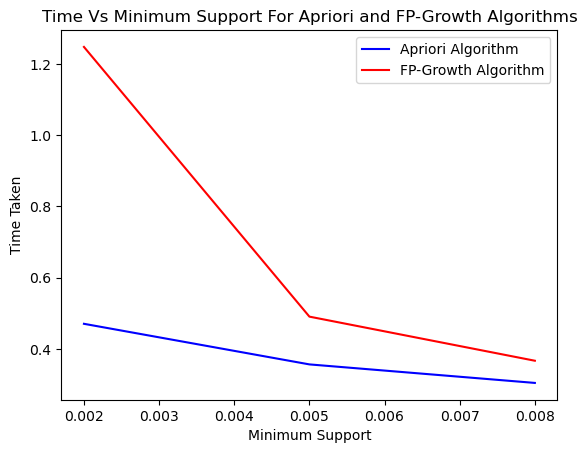

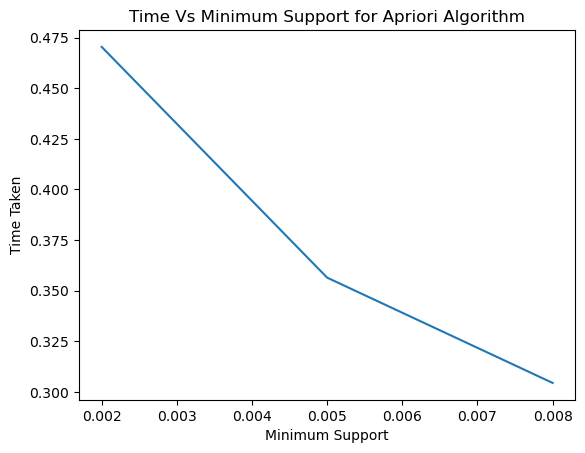

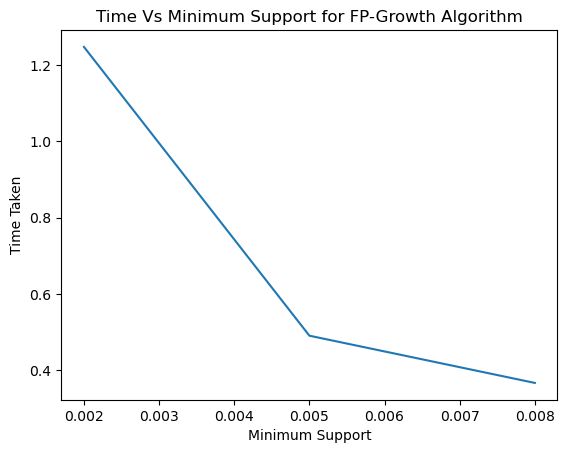

In [36]:
'''
Time Vs Minimum Support :

Two plots have been created which represents time vs minimum support. The first plot represents the three support values
that was taken in tasks 4 and tasks 5. The second plot shows how the time various across a set of support values.

Plot 1:
The time taken to perform the algorithm which was calculated in previous tasks is now used to plot the graph for 
both apriori and fp growth algorithms.

The first plot contains both algorithms together.
The second plot contains plot for apriori algorithm.
The third plot contains plot for fpgrowth algorithm.
'''
min_support_list = [0.002,0.005,0.008]

plt.plot(min_support_list,time_taken_apriori,label="Apriori Algorithm",color="blue")
plt.plot(min_support_list,time_taken_fp,label="FP-Growth Algorithm",color="red")
plt.xlabel("Minimum Support")
plt.ylabel("Time Taken")
plt.title("Time Vs Minimum Support For Apriori and FP-Growth Algorithms")
plt.legend()
plt.show()    
    
plt.plot(min_support_list,time_taken_apriori)
plt.xlabel("Minimum Support")
plt.ylabel("Time Taken")
plt.title("Time Vs Minimum Support for Apriori Algorithm")
plt.show()

plt.plot(min_support_list,time_taken_fp)
plt.xlabel("Minimum Support")
plt.ylabel("Time Taken")
plt.title("Time Vs Minimum Support for FP-Growth Algorithm")
plt.show()

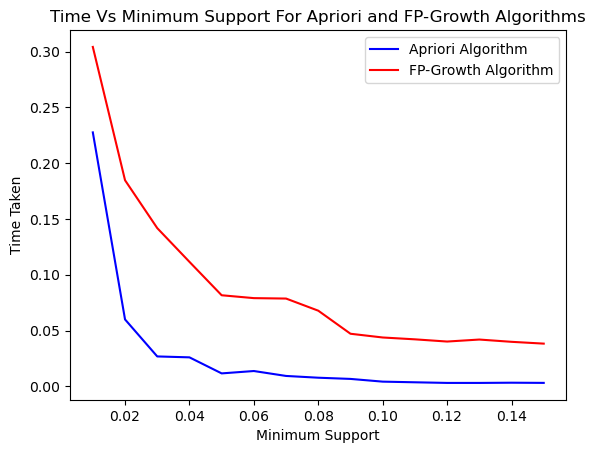

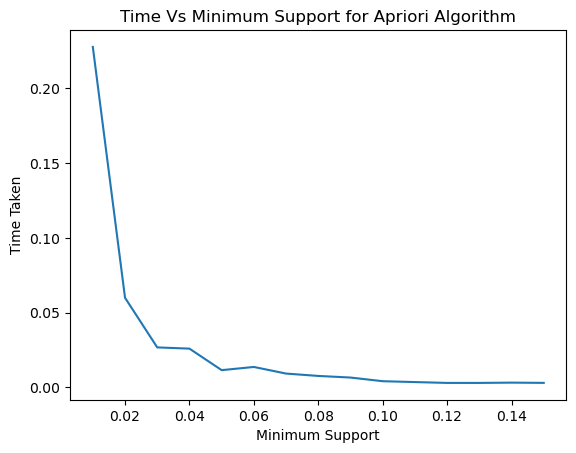

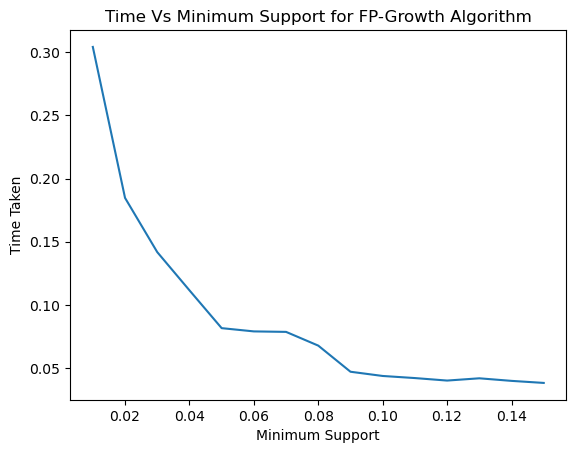

In [37]:
'''
Time Vs Minimum Support :
Plot 2:
The time taken to perform the algorithm is calculated for various support values for both apriori and fpgrowth algorithms.

The first plot represents plot for both the algorithms.
The second plot represents plot for Apriori algorithm.
The third plot represents plot for FpGrowth algorithm.
'''
min_support_list = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15]
time_taken_list_apriori = []
time_taken_list_fp = []
for support_val in min_support_list:
    st = time.time()
    freq_items_bought = apriori(encoded_dt,min_support=support_val,use_colnames=True)
    et = time.time()
    time_taken_list_apriori.append(et-st)
    
    st = time.time()
    freq_items_bought = fpgrowth(encoded_dt,min_support=support_val,use_colnames=True)
    et = time.time()
    time_taken_list_fp.append(et-st)

plt.plot(min_support_list,time_taken_list_apriori,label="Apriori Algorithm",color="blue")
plt.plot(min_support_list,time_taken_list_fp,label="FP-Growth Algorithm",color="red")
plt.xlabel("Minimum Support")
plt.ylabel("Time Taken")
plt.title("Time Vs Minimum Support For Apriori and FP-Growth Algorithms")
plt.legend()
plt.show()    
    
plt.plot(min_support_list,time_taken_list_apriori)
plt.xlabel("Minimum Support")
plt.ylabel("Time Taken")
plt.title("Time Vs Minimum Support for Apriori Algorithm")
plt.show()

plt.plot(min_support_list,time_taken_list_fp)
plt.xlabel("Minimum Support")
plt.ylabel("Time Taken")
plt.title("Time Vs Minimum Support for FP-Growth Algorithm")
plt.show()

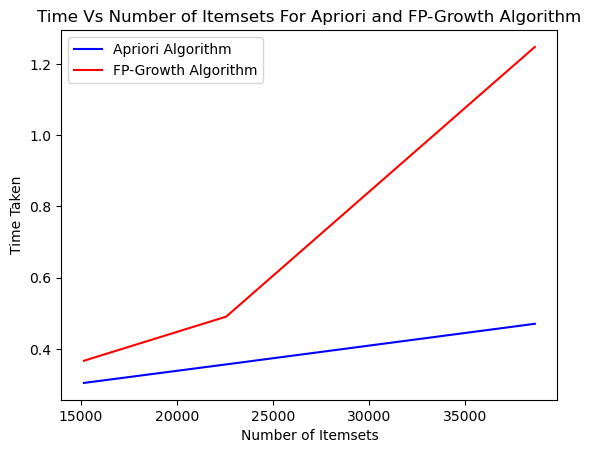

In [38]:
'''
Time Vs Number of Itemsets :
Plot 1:
The time taken to perform the algorithm which was calculated in previous tasks is now used to plot the graph for 
both apriori and fp growth algorithms.

The plot represents both the algorithms together.
The blue color indicates Time Vs Number of Itemsets plot for Apriori Algorithm
The red color indicates Time Vs Number of Itemsets plot for FP-Growth Algorithm
'''
plt.plot(apriori_num_of_itemsets,time_taken_apriori,label="Apriori Algorithm",color="blue")
plt.plot(fp_num_of_itemsets,time_taken_fp,label="FP-Growth Algorithm",color="red")
plt.xlabel("Number of Itemsets")
plt.ylabel("Time Taken")
plt.title("Time Vs Number of Itemsets For Apriori and FP-Growth Algorithm")
plt.legend()
plt.show()

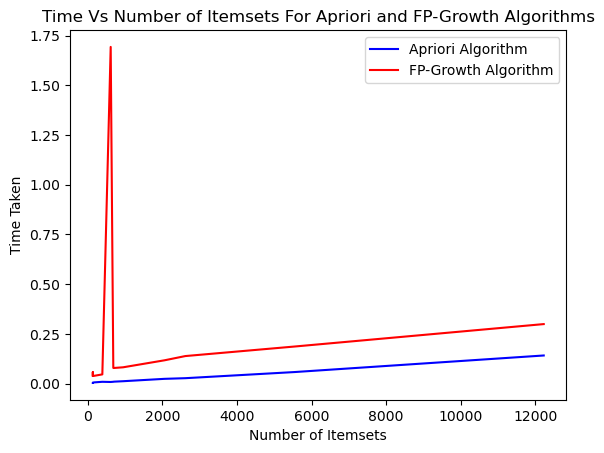

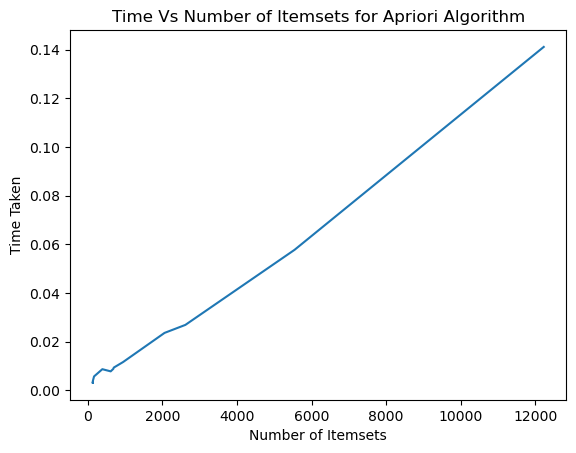

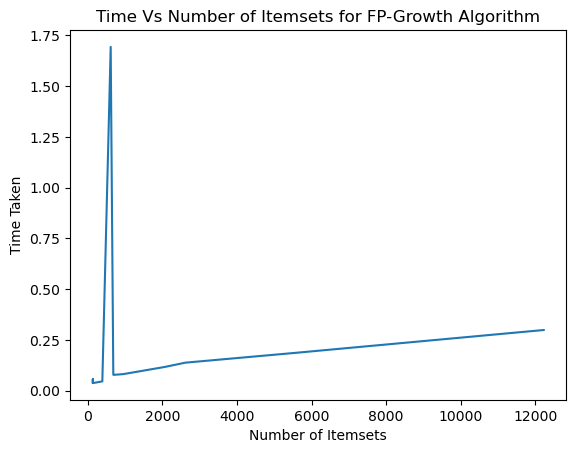

In [39]:
'''
Time Vs Number of Itemsets :
Plot 2:
The time taken to find number of itemsets is calculated for various support values. Three graphs are plotted where:

The first plot represent plot for both the algorithms together.
The second plot represents plot for Apriori algorithm.
The third plot represents plot for FP-Growth algorithm.

'''
min_support_list = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15]
time_taken_list_apriori = []
time_taken_list_fp = []
num_of_itemsets_apriori = []
num_of_itemsets_fp = []
for support_val in min_support_list:
    st = time.time()
    freq_items_bought = apriori(encoded_dt,min_support=support_val,use_colnames=True)
    num_of_itemsets_apriori.append(len(freq_items_bought))
    et = time.time()
    time_taken_list_apriori.append(et-st)
    
    
    st = time.time()
    freq_items_bought = fpgrowth(encoded_dt,min_support=support_val,use_colnames=True)
    num_of_itemsets_fp.append(len(freq_items_bought))
    et = time.time()
    time_taken_list_fp.append(et-st)
    
plt.plot(num_of_itemsets_apriori,time_taken_list_apriori,label="Apriori Algorithm",color="blue")
plt.plot(num_of_itemsets_fp,time_taken_list_fp,label="FP-Growth Algorithm",color="red")
plt.xlabel("Number of Itemsets")
plt.ylabel("Time Taken")
plt.title("Time Vs Number of Itemsets For Apriori and FP-Growth Algorithms")
plt.legend()
plt.show()    
    
plt.plot(num_of_itemsets_apriori,time_taken_list_apriori)
plt.xlabel("Number of Itemsets")
plt.ylabel("Time Taken")
plt.title("Time Vs Number of Itemsets for Apriori Algorithm")
plt.show()

plt.plot(num_of_itemsets_fp,time_taken_list_fp)
plt.xlabel("Number of Itemsets")
plt.ylabel("Time Taken")
plt.title("Time Vs Number of Itemsets for FP-Growth Algorithm")
plt.show()

7.    Explain the insights that you got from the graphs. Which algorithm worked better and what do you believe is the reason?

<b>Two plots are plotted for both the graphs.</b>

<b>For Time Vs Minimum Support Graph:</b><br/>
The first graph represent the support values that were chosen to play with in tasks 4 and task 5.<br/>
The second graph represents the various support values that were chosen for plotting the graph.<br/><br/>

From both the graphs, we can say that:<br/>
In apriori algorithm, we can see that the time taken fluctuates as the minimum support values increases.<br/>
In fp-growth algorithm, we can see that the time taken fluctuates as the minimum support values increases.<br/><br/>

By this we can say that apriori algorithm and fpgrowth algorithms follow same trend, But we can say that fpgrowth algorithm performs better comparitevely to apriori algorithm as it's runtime process increases linearly.<br/><br/>

<b>For Time Vs Number of Itemsets Graph:</b><br/>
The first graph represent the support values that were chosen to play with in tasks 4 and task 5.<br/>
The second graph represents the various support values that were chosen for plotting the graph.<br/><br/>

From both the graphs, we can say that:<br/>
In apriori algorithm, we can see that time taken increases linearly as the number of itemsets increases.<br/>
In fpgrowth algorithm, we can see that time taken increases linearly as the number of itemsets increases. <br/>

By this we can say that both fpgrowth and apriori algorithms follow similar trend in terms of time complexity. 
I believe that fpgrowth might work better comparitively than apriori algorithm as we know that the runtime process increases
as the number of itemsets also increases.

# Sources
https://www.kaggle.com/code/keitazoumana/comparative-analysis-between-apriori-and-fp-growth<br/>
https://www.javatpoint.com/apriori-algorithm-in-machine-learning<br/>
https://www.javatpoint.com/fp-growth-algorithm-in-machine-learning<br/>
https://www.kaggle.com/code/rockystats/apriori-algorithm-or-market-basket-analysis<br/>